HOUSE PRICE PREDICTION

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
df=pd.read_csv("boston.csv")

In [4]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [5]:
df.shape

(506, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [7]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [8]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [9]:
df.nunique()

CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
MEDV       229
dtype: int64

In [10]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

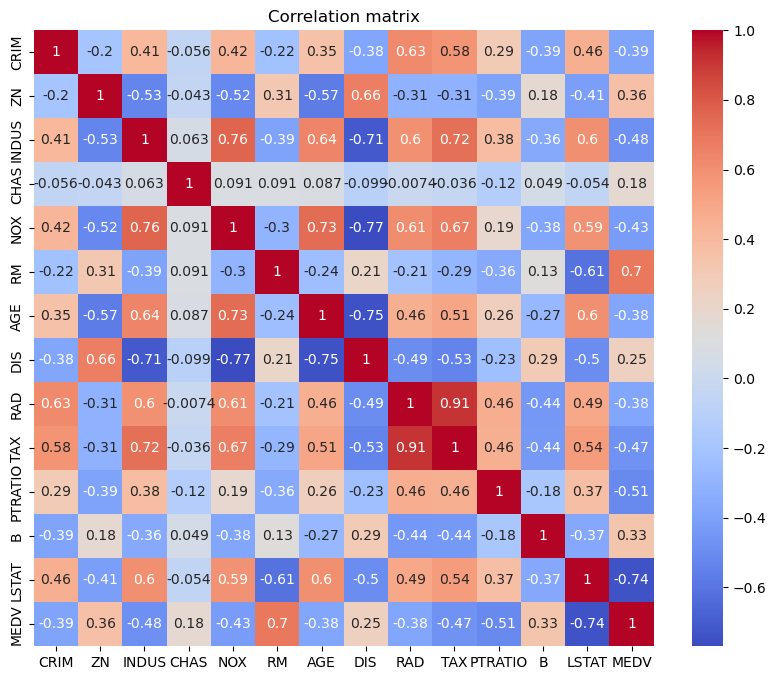

In [11]:
df_correlation=df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(df_correlation,annot=True,cmap='coolwarm')
plt.title('Correlation matrix')
plt.show()

<Axes: xlabel='LSTAT', ylabel='MEDV'>

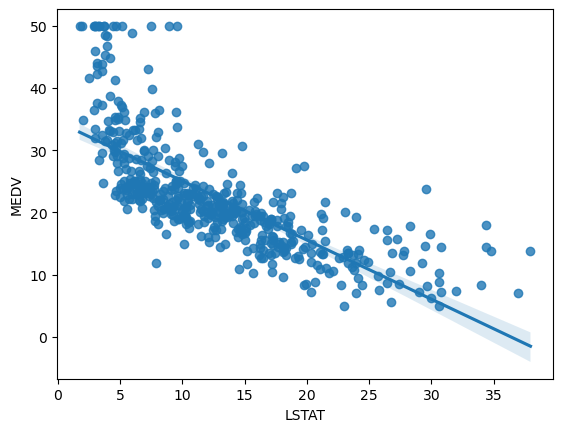

In [12]:
sns.regplot(y=df['MEDV'],x=df['LSTAT'])

<Axes: xlabel='RM', ylabel='MEDV'>

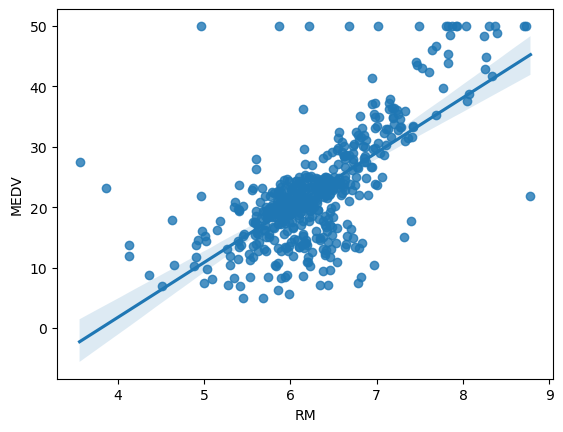

In [13]:
sns.regplot(y=df['MEDV'],x=df['RM'])

In [14]:
import scipy.stats as stats

In [15]:
z_score=stats.zscore(df)
threshold=3
print("Size before removing outliers:",df.shape)
outliers_df=df[(z_score>threshold).any(axis=1)]
df=df[(z_score<=threshold).all(axis=1)]
print("Size after removing outliers:",df.shape)

Size before removing outliers: (506, 14)
Size after removing outliers: (439, 14)


In [16]:
outliers_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
55,0.01311,90.0,1.22,0,0.403,7.249,21.9,8.6966,5,226.0,17.9,395.93,4.81,35.4
56,0.02055,85.0,0.74,0,0.410,6.383,35.7,9.1876,2,313.0,17.3,396.90,5.77,24.7
57,0.01432,100.0,1.32,0,0.411,6.816,40.5,8.3248,5,256.0,15.1,392.90,3.95,31.6
141,1.62864,0.0,21.89,0,0.624,5.019,100.0,1.4394,4,437.0,21.2,396.90,34.41,14.4
142,3.32105,0.0,19.58,1,0.871,5.403,100.0,1.3216,5,403.0,14.7,396.90,26.82,13.4


In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
scaler=StandardScaler()
scaler.fit(df)
df_scaled=pd.DataFrame(scaler.transform(df),columns=df.columns)

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


In [20]:
X=df.drop(columns=['MEDV','RAD'],axis=1)
y=df['MEDV']


In [21]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)


In [22]:
print(f"X_train:{X_train.shape}")
print(f"X_test:",{X_test.shape})

X_train:(351, 12)
X_test: {(88, 12)}


In [23]:
models=[
    ('Random forest',RandomForestRegressor()),
    ('Linear Regression',LinearRegression()),

    ('Decision Tree',DecisionTreeRegressor()),
   
]



In [24]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [25]:
for name,model in models:
    print(name)
    print()
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    print('mean_squared_error:',mean_squared_error(y_test,y_pred))
    print('\n')
    print('mean_absolute_error:',mean_absolute_error(y_test,y_pred))
    print('\n')
    print('R score:',r2_score(y_test,y_pred))
    print('\n')

Random forest

mean_squared_error: 6.837593193181821


mean_absolute_error: 1.8485340909090924


R score: 0.8973302424759909


Linear Regression

mean_squared_error: 15.196264577830215


mean_absolute_error: 2.4283655747430344


R score: 0.7718207627455398


Decision Tree

mean_squared_error: 12.12534090909091


mean_absolute_error: 2.5056818181818183


R score: 0.8179321618206706




In [26]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import root_mean_squared_error,r2_score

In [27]:
models = {
    "Linear Regression": {
        "model": LinearRegression(),
        "params": {
            'fit_intercept': [True, False]
        }
    },
    "Decision Tree": {
        "model": DecisionTreeRegressor(random_state=42),
        "params": {
            'max_depth': [None, 5, 10],
            'min_samples_split': [2, 5],
            'min_samples_leaf': [1, 2]
        }
    },
    "Random Forest": {
        "model": RandomForestRegressor(random_state=42),
        "params": {
            'n_estimators': [100, 200],
            'max_depth': [None, 10, 20],
            'min_samples_split': [2, 5],
            'min_samples_leaf': [1, 2]
        }
    }
}


In [28]:
best_models = {}

for name, model in models.items():
    print(f"\n Tuning {name}")
    grid = GridSearchCV(model["model"], model["params"], cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
    grid.fit(X_train, y_train)
    
    best_model = grid.best_estimator_
    y_pred = best_model.predict(X_test)
    rmse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    best_models[name] = {
        "model": best_model,
        "RMSE": rmse,
        "R²": r2,
        "Best Params": grid.best_params_
    }

print("\n Model Comparison:")
for name, info in best_models.items():
    print(f"{name}: RMSE = {info['RMSE']:.2f}, R² = {info['R²']:.2f}")
    print(f"  Best Params: {info['Best Params']}")



 Tuning Linear Regression

 Tuning Decision Tree

 Tuning Random Forest

 Model Comparison:
Linear Regression: RMSE = 15.20, R² = 0.77
  Best Params: {'fit_intercept': True}
Decision Tree: RMSE = 13.68, R² = 0.79
  Best Params: {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2}
Random Forest: RMSE = 6.45, R² = 0.90
  Best Params: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [29]:
best_by_rmse = min(best_models.items(), key=lambda x: x[1]['RMSE'])
print(f"\n Best Model by RMSE: {best_by_rmse[0]}")
print(f"   RMSE: {best_by_rmse[1]['RMSE']:.2f}, R²: {best_by_rmse[1]['R²']:.2f}")

best_by_r2 = max(best_models.items(), key=lambda x: x[1]['R²'])
print(f"\n Best Model by R²: {best_by_r2[0]}")
print(f"   R²: {best_by_r2[1]['R²']:.2f}, RMSE: {best_by_r2[1]['RMSE']:.2f}")



 Best Model by RMSE: Random Forest
   RMSE: 6.45, R²: 0.90

 Best Model by R²: Random Forest
   R²: 0.90, RMSE: 6.45
